In [0]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import random, decimal

%matplotlib inline


In [0]:
df = pd.read_csv('dsTipoCaso3.csv', parse_dates=['DAT_HORA_ATENDIMENTO'],encoding="ISO-8859-1")

In [0]:
df.dtypes


DAT_HORA_ATENDIMENTO          datetime64[ns]
NOM_ENCAMINHAMENTO                    object
NOM_MODALIDADE_ATENDIMENTO            object
NOM_MUNICIPIO                         object
NOM_EQUIPE                            object
NOM_TIPO_CASO                         object
IDADE                                float64
dtype: object

adicionando dia da semana no dataframe

In [0]:
df['DIASEMANA'] = df['DAT_HORA_ATENDIMENTO'].dt.dayofweek
dfNovo = df[['DIASEMANA','NOM_MUNICIPIO','NOM_EQUIPE','NOM_MODALIDADE_ATENDIMENTO']]
dfNovo.describe()


,DIASEMANA
count,15069.000000
mean,2.328157
std,1.752208
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,6.000000


<h2>Plotando o dataset puro </h2>



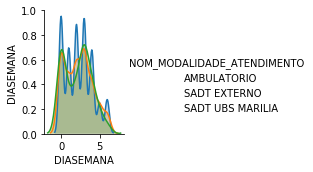

In [0]:
sb.pairplot(dfNovo,hue='NOM_MODALIDADE_ATENDIMENTO')
#pl.legend()


In [0]:
df.head()


,DAT_HORA_ATENDIMENTO,NOM_ENCAMINHAMENTO,NOM_MODALIDADE_ATENDIMENTO,NOM_MUNICIPIO,NOM_EQUIPE,NOM_TIPO_CASO,IDADE,DIASEMANA
0,2016-01-25 07:00:00,RETORNO,AMBULATORIO,QUINTANA,CIRURGIA PLÁSTICA,RETORNO,45.177323,0
1,2016-02-29 07:00:00,RETORNO,AMBULATORIO,MARILIA,CIRURGIA PLÁSTICA,POS CIRURGICO,29.215679,0
2,2016-02-29 07:00:00,RETORNO,AMBULATORIO,MARILIA,CIRURGIA PLÁSTICA,POS CIRURGICO,41.804720,0
3,2016-07-03 07:00:00,RETORNO,AMBULATORIO,MARILIA,CIRURGIA PLÁSTICA,POS CIRURGICO,21.774583,6
4,2016-07-03 07:00:00,ALTA,AMBULATORIO,DUARTINA,CIRURGIA PLÁSTICA,POS CIRURGICO,46.374583,6


In [0]:
dfCluster = df[['NOM_ENCAMINHAMENTO','DIASEMANA']]
dfCluster = dfCluster[dfCluster.NOM_ENCAMINHAMENTO.isin(['ALTA', 'RETORNO'])]
dfCluster = pd.concat([dfCluster, pd.get_dummies(dfCluster['NOM_ENCAMINHAMENTO'])], axis=1);
dfCluster

,NOM_ENCAMINHAMENTO,DIASEMANA,ALTA,RETORNO
0,RETORNO,0,0,1
1,RETORNO,0,0,1
2,RETORNO,0,0,1
3,RETORNO,6,0,1
4,ALTA,6,1,0
...,...,...,...,...
15063,RETORNO,2,0,1
15064,RETORNO,2,0,1
15065,RETORNO,4,0,1
15066,RETORNO,3,0,1


In [0]:
X = np.array(dfCluster.drop('NOM_ENCAMINHAMENTO',axis = 1))


## K-means com 3 cluster

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [0]:
dfCluster

,NOM_ENCAMINHAMENTO,DIASEMANA,ALTA,RETORNO
0,RETORNO,0,0,1
1,RETORNO,0,0,1
2,RETORNO,0,0,1
3,RETORNO,6,0,1
4,ALTA,6,1,0
...,...,...,...,...
15063,RETORNO,2,0,1
15064,RETORNO,2,0,1
15065,RETORNO,4,0,1
15066,RETORNO,3,0,1


In [0]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
kmeans.labels_

array([0, 0, 0, ..., 1, 2, 2], dtype=int32)

In [0]:
dfCluster['K-classes'] = kmeans.labels_

<h2>Plotando o resultado da clusterização</h2>

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


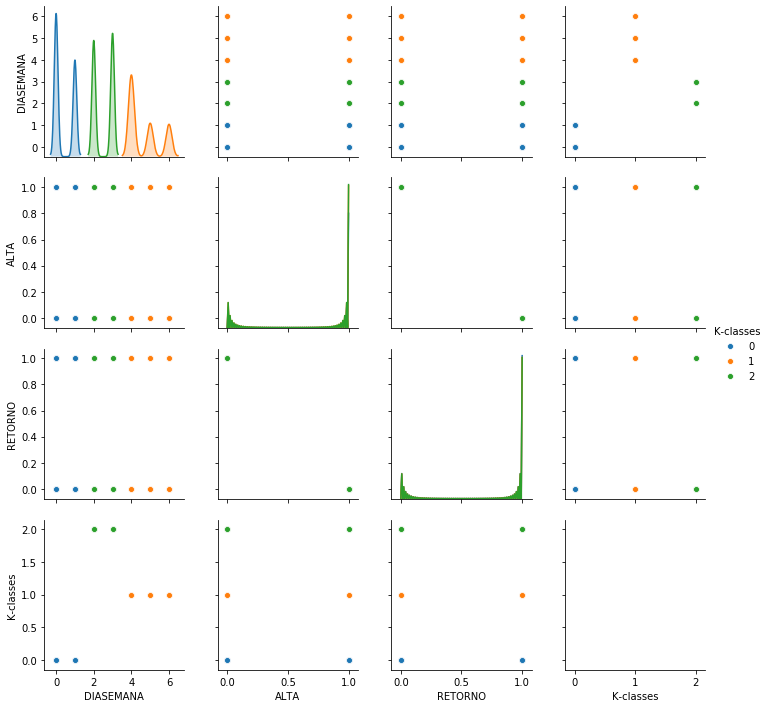

In [0]:
sb.pairplot(dfCluster,hue='K-classes')